In [2]:
from matplotlib import pyplot as plt
import numpy as np
import torch

import sys
home = '/home/nina/CopulaGP/'
sys.path.insert(0, home)

from bvcopula import GaussianCopula, ClaytonCopula, FrankCopula, GumbelCopula, StudentTCopula


In [3]:
import pickle as pkl
import numpy as np

animal = 'ST263'
day_name = 'Day4'
path = '/home/nina/GPyTorch/LFI/data_scan/{}'.format(day_name.lower())

counters = np.zeros(5)
orients = np.zeros(4)

names = ['Gaussian','Frank','Clayton','Gumbel']
orientations = ['0°', '90°', '180°', '270°']

for i in range(-5,22,1):
    for j in range(i+1,23,1):
        try:
            with open("{}/{}_{}_{}-{}_best.pkl".format(path,animal,day_name,i,j),'rb') as f:
                res = pkl.load(f)
            #print(res['copulas'])
            if len(res['copulas'])==0:
                counters[-1] += 1
            else:
                for copula in res['copulas']:
                    for n, name in enumerate(names):
                        if copula[0] == name:
                            counters[n] += 1
                    for o, orient in enumerate(orientations):
                        if copula[1] == orient:
                            orients[o] += 1
        except FileNotFoundError as error:
            print(i,j)
print(100*counters/np.sum(counters))
print(100*orients/np.sum(orients))

percent = np.round(100*counters/np.sum(counters[:-1]))

-5 -4
-5 -3
-5 -2
-5 -1
-5 0
-5 1
-5 2
-5 3
-5 4
-5 5
-5 6
-5 7
-5 8
-5 9
-5 10
-5 11
-5 12
-5 13
-5 14
-5 15
-5 16
-5 17
-5 18
-5 19
-5 20
-5 21
-5 22
-4 -3
-4 -2
-4 -1
-4 0
-4 1
-4 2
-4 3
-4 4
-4 5
-4 6
-4 7
-4 8
-4 9
-4 10
-4 11
-4 12
-4 13
-4 14
-4 15
-4 16
-4 17
-4 18
-4 19
-4 20
-4 21
-4 22
-3 -2
-3 -1
-3 0
-3 1
-3 2
-3 3
-3 4
-3 5
-3 6
-3 7
-3 8
-3 9
-3 10
-3 11
-3 12
-3 13
-3 14
-3 15
-3 16
-3 17
-3 18
-3 19
-3 20
-3 21
-3 22
-2 -1
-2 0
-2 1
-2 2
-2 3
-2 4
-2 5
-2 6
-2 7
-2 8
-2 9
-2 10
-2 11
-2 12
-2 13
-2 14
-2 15
-2 16
-2 17
-2 18
-2 19
-2 20
-2 21
-2 22
-1 0
-1 1
-1 2
-1 3
-1 4
-1 5
-1 6
-1 7
-1 8
-1 9
-1 10
-1 11
-1 12
-1 13
-1 14
-1 15
-1 16
-1 17
-1 18
-1 19
-1 20
-1 21
-1 22
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
3 4
3 5
3

/home/nina/.envs/GPyTorch_new/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/home/nina/.envs/GPyTorch_new/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/home/nina/.envs/GPyTorch_new/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


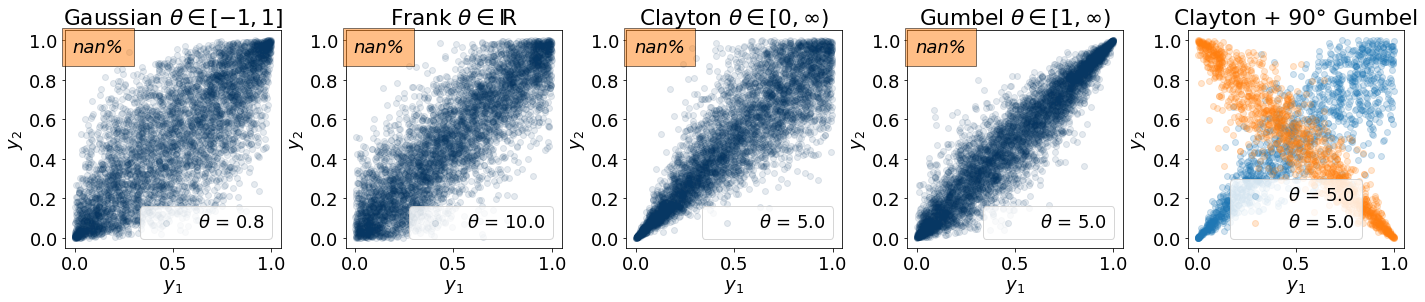

In [3]:
# here we generate some synthetic samples
import matplotlib.cm as cm

NSamp = int(5000)
color='#073763ff'

X = np.linspace(0.,1.,NSamp) 

plt.rcParams.update({'font.size': 18})

fig, ax = plt.subplots(1,5,figsize=(24,4.0))

model = GaussianCopula(torch.ones(NSamp).float()*0.8)
Y = model.sample().numpy().squeeze()
ax[0].scatter(*Y.T, color=color, alpha=0.1, label=r'$\theta$ = 0.8')# color=colors)
ax[0].set_xlabel('$y_1$')
ax[0].set_ylabel('$y_2$')
ax[0].set_title(r'Gaussian $\theta \in [-1,1]$')
ax[0].legend(loc=4)

model = FrankCopula(torch.ones(NSamp).float()*10.0)
Y = model.sample().numpy().squeeze()
ax[1].scatter(*Y.T, color=color, alpha=0.1, label=r'$\theta$ = 10.0')# color=colors)
ax[1].set_xlabel('$y_1$')
ax[1].set_ylabel('$y_2$')
ax[1].set_title(r'Frank $\theta \in {\rm I\!R}$')
ax[1].legend(loc=4)

model = ClaytonCopula(torch.ones(NSamp).float()*5.0, rotation='0°')
Y = model.sample().numpy().squeeze()
ax[2].scatter(*Y.T, color=color, alpha=0.1, label=r'$\theta$ = 5.0')# color=colors)
ax[2].set_xlabel('$y_1$')
ax[2].set_ylabel('$y_2$')
ax[2].set_title(r'Clayton $\theta \in [0,\infty)$')
ax[2].legend(loc=4)

model = GumbelCopula(torch.ones(NSamp).float()*5.0, rotation='0°')
Y = model.sample().numpy().squeeze()
ax[3].scatter(*Y.T, color=color, alpha=0.1, label=r'$\theta$ = 5.0')# color=colors)
ax[3].set_xlabel('$y_1$')
ax[3].set_ylabel('$y_2$')
ax[3].set_title(r'Gumbel $\theta \in [1,\infty)$')
ax[3].legend(loc=4)

for i in range(4):
    sh = 0
    ax[i].text(-.01, 0.94+sh, "{:.0f}%".format(percent[i]), style='italic',
        bbox={'facecolor': 'C1', 'alpha': 0.5, 'pad': 10})

for r,c,C in zip(['0°','90°'],['C0','C1'],[ClaytonCopula,GumbelCopula]):
    model = C(torch.ones(int(NSamp/4)).float()*5.0, rotation=r)
    Y = model.sample().numpy().squeeze()
    ax[4].scatter(*Y.T, color=c, alpha=0.2, label=r'$\theta$ = 5.0')# color=colors)
ax[4].set_xlabel('$y_1$')
ax[4].set_ylabel('$y_2$')
ax[4].set_title('Clayton + 90° Gumbel')
ax[4].legend()

plt.subplots_adjust(wspace=0.3)

# plt.savefig('/families.svg')
fig.show()

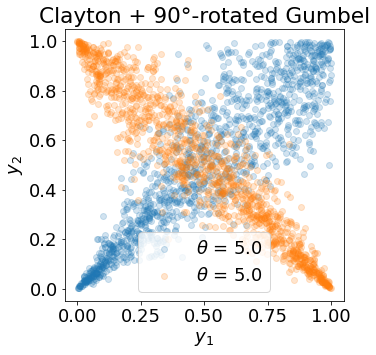

In [8]:
fig = plt.figure(figsize=(5,5))

for r,c,C in zip(['0°','90°'],['C0','C1'],[ClaytonCopula,GumbelCopula]):
    model = C(torch.ones(int(NSamp/4)).float()*5.0, rotation=r)
    Y = model.sample().numpy().squeeze()
    plt.scatter(*Y.T, color=c, alpha=0.2, label=r'$\theta$ = 5.0')# color=colors)
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('Clayton + 90°-rotated Gumbel')
plt.legend()
plt.savefig('/home/nina/CopulaGP/results/mixture.pdf')

In [4]:
class sfg():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #/questions/110685/matplotlib-can-i-create-axessubplot-objects-then-add-them-to-a-figure-instance/689918#689918
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

(-3.0, 3.0, -3.0, 3.0)

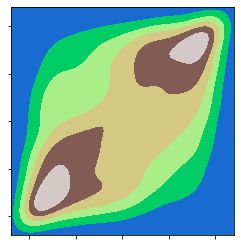

In [23]:
# here we generate some synthetic samples
import matplotlib.cm as cm
from scipy.stats import norm
import seaborn as sns
import matplotlib.gridspec as gridspec

NSamp = int(1e4)
color='#073763ff'

X = np.linspace(0.,1.,NSamp) 

plt.rcParams.update({'font.size': 18})

# model = GaussianCopula(torch.ones(5000).float()*(+0.5))
# Y = model.sample().numpy().squeeze()
# Y_unimodal = norm.ppf(Y)
# Y_bimodal = np.empty_like(Y)
# Y_bimodal[:,1][Y[:,1]>0.5] = norm.ppf(2*Y[:,1][Y[:,1]>0.5]-1.)+2.5
# Y_bimodal[:,1][Y[:,1]<=0.5] = norm.ppf(2*Y[:,1][Y[:,1]<=0.5])-2.5
# Y_bimodal[:,0] = norm.ppf(Y[:,0])

# gs = gridspec.GridSpec(1,3)

#cmap = 'Blues'

fig, (g1) = plt.subplots(1,1,figsize=(4,4.2))
sns.kdeplot(*Y.T, kind="kde", shade=True,  shade_lowest=True, n_levels=6, ax=g1,bw_adjust=2, cmap='terrain')
sns.kdeplot(*Y_unimodal.T, kind="kde", shade=False,  shade_lowest=False, ax=g0, n_levels=6, bw_adjust=2)
# g2 = sns.jointplot(*Y_bimodal.T, kind="kde", shade=True,  shade_lowest=True, joint_kws = dict(alpha=1., cmap='Blues'), n_levels=6)#, cmap=cmap)

# g0.set_xlim(-3, 3)
# g0.set_ylim(-3, 3)
# g0.set_xticklabels([])
# g0.set_yticklabels([])

g1.set_xlim(-0.1, 1.1)
g1.set_ylim(-0.1, 1.1)
g1.set_xticks(np.linspace(0,1,5))
g1.set_yticks(np.linspace(0,1,5))
g1.set_xticklabels([])
g1.set_yticklabels([])
# g1.set_title(r'$\rho=+0.5$')

# g2.ax_marg_x.set_xlim(-2.5, 2.5)
# g2.ax_marg_y.set_ylim(-5, 5)
# g2.ax_marg_x.set_xticklabels([])
# g2.ax_marg_y.set_yticklabels([])

g0.axis("off")
# g1.axis("off")

# g0.savefig('/home/nina/CopulaGP/results/intro1.svg')
# g1.savefig('/home/nina/CopulaGP/results/intro0.svg')
# g2.savefig('/home/nina/CopulaGP/results/intro2.svg')

# mg0 = sfg.SeabornFig2Grid(g0, fig, gs[0])
# mg1 = sfg.SeabornFig2Grid(g1, fig, gs[1])
# mg2 = sfg.SeabornFig2Grid(g2, fig, gs[2])

# gs.tight_layout(fig)

# plt.show()

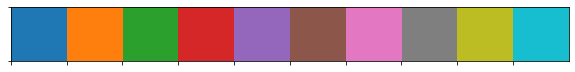

In [21]:
sns.palplot(cp)